# Linear Regression with one variable

### Needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset and converting to NumPy array

In [2]:
dataset = pd.read_csv('data.txt', sep=",", header=None, names=["population", "profit"])
dataset = dataset.to_numpy()

### Separating feature from label

In [3]:
X = dataset[:, [0]]
y = dataset[:, [1]]
m = len(y)

### Concatenating an array of one's to X

In [4]:
X = np.concatenate((np.ones((m, 1), dtype=np.int8), X), axis=1)

### Cost Function

In [5]:
# Initializing theta

theta = np.zeros((2, 1))

In [6]:
def computeCost(X, y, theta):
    J = 0
    hypothesis_func = np.dot(X, theta)
    sqr_errors = np.power((hypothesis_func - y), 2)
    J = (1 /(2 * m)) * np.sum(sqr_errors)
    return J

### Gradient Descent

In [7]:
iterations = 1500;
alpha = 0.01;

def gradientDescent(X, y, theta, alpha, iterations):
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations, 2))
    
    for iteration in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * alpha * (X.T.dot((prediction - y)))
        theta_hist[iteration,:] = theta.T
        cost_hist[iteration] = computeCost(X, y, theta)
        
    return theta, cost_hist, theta_hist

In [8]:
theta, cost_values, theta_values = gradientDescent(X, y, theta, alpha, iterations)

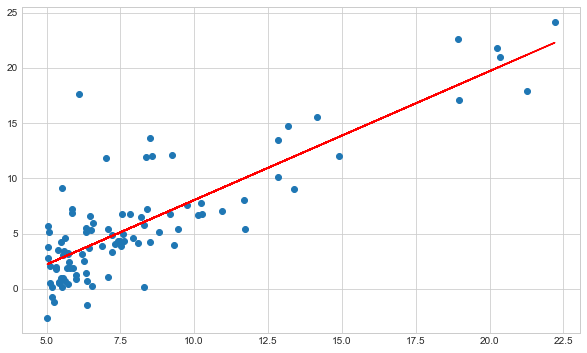

In [9]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,[1]], y, cmap='winter')
ax.plot(X[:,1], np.dot(X, theta), '-', c="red")
plt.show()

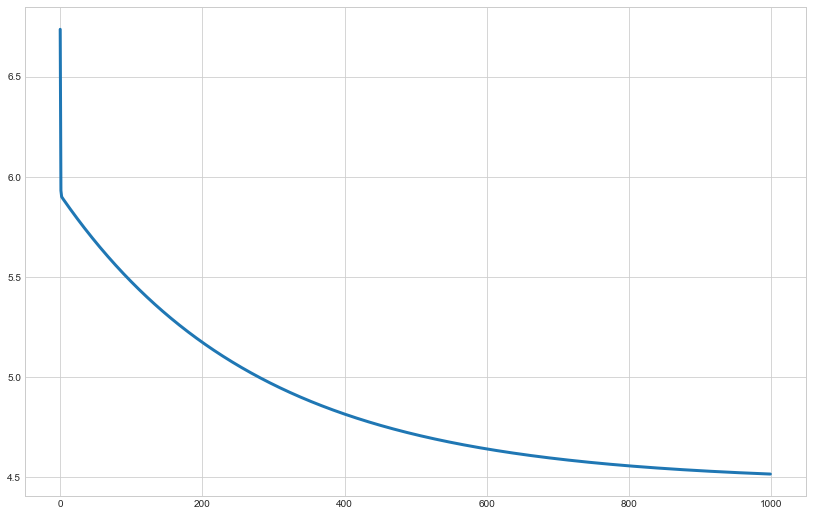

In [41]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(range(1000), cost_values[:1000], linewidth=3)
plt.show()

In [43]:
from mpl_toolkits import mplot3d

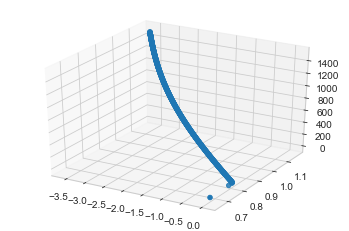

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(theta_values[:, 0], theta_values[:, 1], range(iterations), cmap='Greens');